In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import correlate
from sklearn.metrics import r2_score
from statsmodels.tsa.arima_model import ARMA
import seaborn as sns
%matplotlib inline

In [2]:
data_path = '../SIGA/'
camp_folder = data_path + 'campamento/'
sierra_folder = data_path + 'sierraGorda/'

In [24]:
def r2(x,y):
    y_mean = np.mean(y)
    SStot = sum(np.power((y-y_mean),2))
    SSres = sum(np.power((x-y),2))
    r_square = 1-SSres/SStot
    return r_square[0]

In [45]:
# cargar datos metereologicos de campamento (spence)
# cargar datos metereologicos de sierraGorda (poblado)
name_cols_sg = ['Fecha_sg', 'hora_sg', 'DIR_sg', 'VEL_sg', 'TEMP_sg', 'HR_sg', 'PLUV_sg', 'RAD_SOLAR_sg']
name_cols_camp = ['Fecha_camp', 'hora_camp', 'DIR_camp', 'VEL_camp', 'TEMP_camp', 'HR_camp', 'PLUV_camp', 'RAD_SOLAR_camp']
camp_cols_dtypes = {'Fecha_camp':str, 'hora_camp':str, 'DIR_camp':float, 'VEL_camp':np.float64, 
               'TEMP_camp':np.float64, 'HR_camp':np.float64,'PLUV_camp':np.float64, 
               'RAD_SOLAR_camp':np.float64}
sg_cols_dtypes = {'Fecha_sg':str, 'hora_sg':str, 'DIR_sg':float, 'VEL_sg':np.float64, 
               'TEMP_sg':np.float64, 'HR_sg':np.float64,'PLUV_sg':np.float64, 
               'RAD_SOLAR_sg':np.float64}
met_sg_2017 = pd.read_excel(sierra_folder + 'met_2017_hora.xlsx',usecols=list(range(1,9)),
                            names=name_cols_sg, converters = sg_cols_dtypes)
met_camp_2017 = pd.read_excel(camp_folder + 'met_2017_hora.xlsx', usecols=list(range(1,9)), 
                              names=name_cols_camp, converters = camp_cols_dtypes)

In [47]:
# merge para ver bººbque dias coinciden sg y camp en 2017
met_camp_2017['Fecha_camp'] = pd.to_datetime(met_camp_2017['Fecha_camp'])
met_sg_2017['Fecha_sg'] = pd.to_datetime(met_sg_2017['Fecha_sg'])
met_2017 = pd.merge(met_sg_2017, met_camp_2017, left_on=['Fecha_sg','hora_sg'],right_on=['Fecha_camp', 'hora_camp'])
met_2017[cols_numeric] = met_2017[cols_numeric].apply(pd.to_numeric, errors='coerce')
met_2017 =  met_2017.dropna()

scikit r2: 0.73
Coeficiente de Pearson: 0.864662


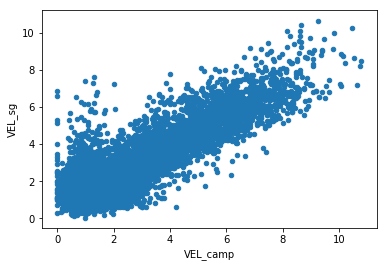

In [55]:
met_2017.plot.scatter(x='VEL_camp', y='VEL_sg')
vel_camp = met_2017[['VEL_camp']].values
vel_sg =met_2017[['VEL_sg']].values
print('scikit r2: %.2f' % r2_score(vel_camp, vel_sg))
person_coeff = stats.pearsonr(vel_camp,vel_sg)
print('Coeficiente de Pearson: %f' % person_coeff[0])

scikit r2: -0.74
Coeficiente de Pearson: 0.329737


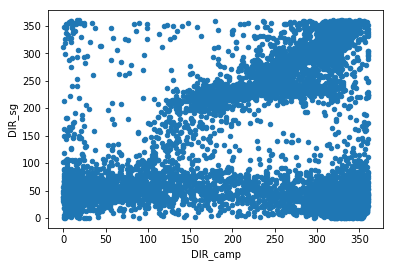

In [65]:
met_2017.plot.scatter(x='DIR_camp', y='DIR_sg')
vel_camp = met_2017[['DIR_camp']].values
vel_sg =met_2017[['DIR_sg']].values
print('scikit r2: %.2f' % r2_score(vel_camp, vel_sg))
person_coeff = stats.pearsonr(vel_camp,vel_sg)
print('Coeficiente de Pearson: %f' % person_coeff[0])

In [60]:
# cargar datos metereologicos de campamento (spence)
# cargar datos metereologicos de sierraGorda (poblado)
name_cols_sg = ['Fecha_sg', 'hora_sg', 'DIR_sg', 'VEL_sg', 'TEMP_sg', 'HR_sg', 'PLUV_sg', 'RAD_SOLAR_sg']
name_cols_camp = ['Fecha_camp', 'hora_camp', 'DIR_camp', 'VEL_camp', 'TEMP_camp', 'HR_camp', 'PLUV_camp', 'RAD_SOLAR_camp']
camp_cols_dtypes = {'Fecha_camp':str, 'hora_camp':str, 'DIR_camp':float, 'VEL_camp':np.float64, 
               'TEMP_camp':np.float64, 'HR_camp':np.float64,'PLUV_camp':np.float64, 
               'RAD_SOLAR_camp':np.float64}
sg_cols_dtypes = {'Fecha_sg':str, 'hora_sg':str, 'DIR_sg':float, 'VEL_sg':np.float64, 
               'TEMP_sg':np.float64, 'HR_sg':np.float64,'PLUV_sg':np.float64, 
               'RAD_SOLAR_sg':np.float64}
met_sg_2018 = pd.read_excel(sierra_folder + 'met_2018_hora.xlsx',usecols=list(range(1,9)),
                            names=name_cols_sg, converters = sg_cols_dtypes)
met_camp_2018 = pd.read_excel(camp_folder + 'met_2018_hora.xlsx', usecols=list(range(1,9)), 
                              names=name_cols_camp, converters = camp_cols_dtypes)


In [61]:
# merge para ver bººbque dias coinciden sg y camp en 2018
met_camp_2018['Fecha_camp'] = pd.to_datetime(met_camp_2018['Fecha_camp'])
met_sg_2018['Fecha_sg'] = pd.to_datetime(met_sg_2018['Fecha_sg'])
met_2018 = pd.merge(met_sg_2018, met_camp_2018, left_on=['Fecha_sg','hora_sg'],right_on=['Fecha_camp', 'hora_camp'])
met_2018[cols_numeric] = met_2018[cols_numeric].apply(pd.to_numeric, errors='coerce')
met_2018 =  met_2018.dropna()

scikit r2: 0.72
Coeficiente de Pearson: 0.858944


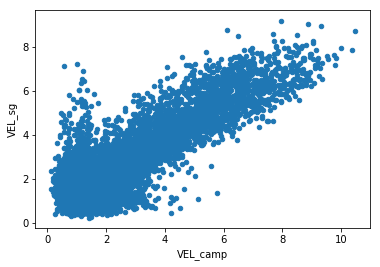

In [62]:
# reg velocidades entre poblado 
met_2018.plot.scatter(x='VEL_camp', y='VEL_sg')
vel_camp = met_2018[['VEL_camp']].values
vel_sg =met_2018[['VEL_sg']].values
print('scikit r2: %.2f' % r2_score(vel_camp, vel_sg))
person_coeff = stats.pearsonr(vel_camp,vel_sg)
print('Coeficiente de Pearson: %f' % person_coeff[0])

In [194]:
# graficos de PM10 desde la base data_dust_hourly.xlsx
data_camilo_path = '../datosCamilo/'
data_camilo = data_camilo_path + 'BasePorHora_PM10_MET.xls'
cols = ['Fecha', 'SP_CAMP_MP_10','SP_SG_MP_10']
cols_type = {'Fecha':str, 'SP_CAMP_MP_10':float,'SP_SG_MP_10':float}
df_dust_hourly = pd.read_excel(data_camilo)
df_MP10 = df_dust_hourly[['Fecha','SP_CAMP_MP_10', 'SP_CAMP_TEMP', 'SP_SG_MP_10', 'SP_CAMP_DIR', 'SP_CAMP_VEL',
                         'SP_SG_VEL', 'SP_SG_DIR']].copy()

In [195]:
PM10_dicc = {}
numData_dicc = {}
df_MP10_wo_nan = df_MP10.dropna()
df_MP10_wo_nan['Fecha'] = pd.to_datetime(df_MP10_wo_nan['Fecha'])
for month in range(1,13):
    dicc_hour = {}
    numData_hour = {}
    for hour in range(24):
        df_month_hour = df_MP10_wo_nan.loc[(df_MP10_wo_nan['Fecha'].dt.hour == hour) & 
                                    (df_MP10_wo_nan['Fecha'].dt.month == month)]
        dicc_hour[hour] = df_month_hour['SP_CAMP_MP_10'].corr(df_month_hour['SP_SG_MP_10'])
        numData_hour[hour] = df_month_hour['SP_CAMP_MP_10'].size
    PM10_dicc[month] = dicc_hour
    numData_dicc[month] = numData_hour

C:\Users\Equipo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


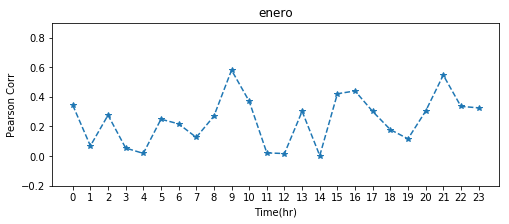

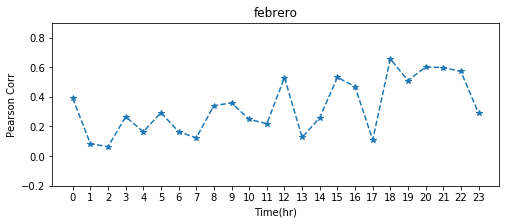

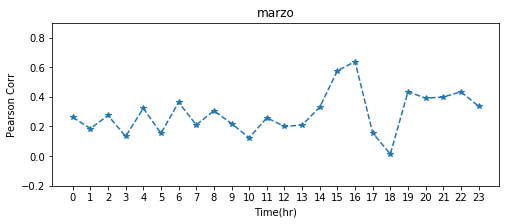

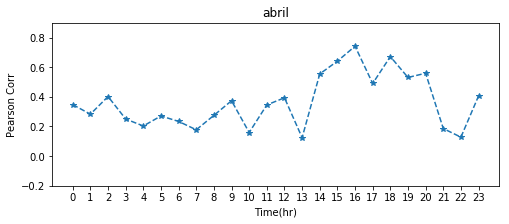

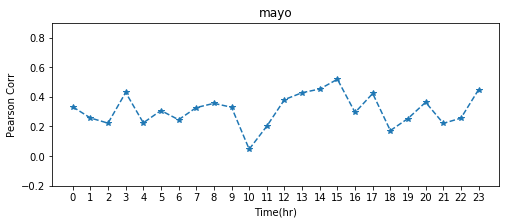

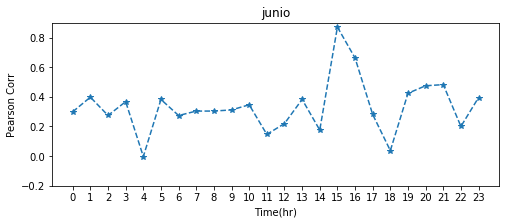

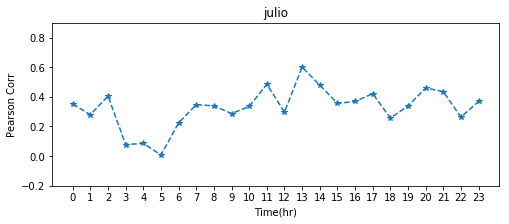

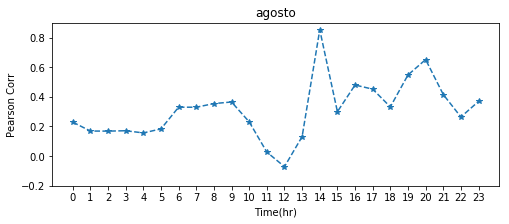

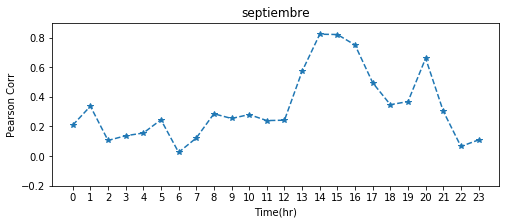

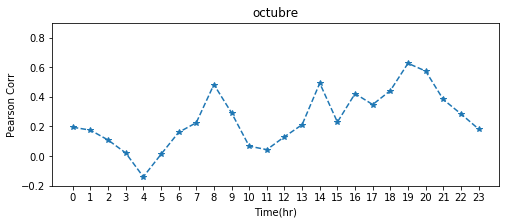

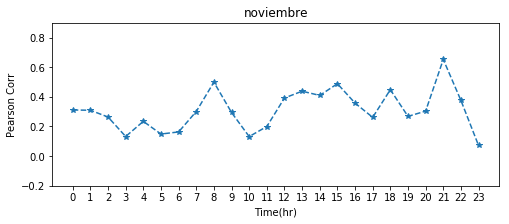

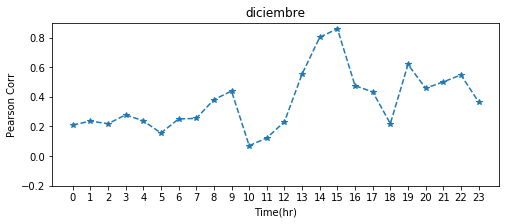

In [196]:
meses = ['enero', 'febrero', 'marzo','abril', 'mayo', 'junio', 
          'julio', 'agosto', 'septiembre', 'octubre','noviembre', 'diciembre']
for month in range(1,13):
    plt.figure(figsize=(8,3))
    corr_by_hour = PM10_dicc[month]
    num_by_hour = numData_dicc[month]
    corr_list = [corr_by_hour[key] for key in range(24)]
    num_list = [num_by_hour[key] for key in range(24)]
    plt.plot(range(24), corr_list, '*--')
    #plt.bar(range(24), num_list)
    plt.ylim(-0.2,0.9)
    plt.xticks(list(range(24)))
    plt.title(meses[month-1])
    plt.xlabel('Time(hr)')
    plt.ylabel('Pearson Corr')
plt.show()

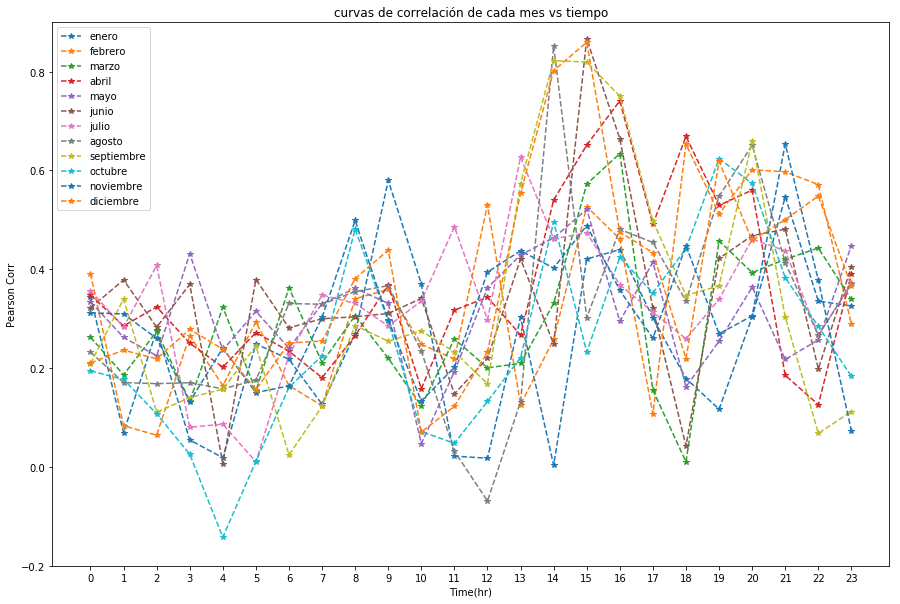

In [121]:
plt.figure(figsize=(15,10))
for month in range(1,13):
    corr_by_hour = PM10_dicc[month]
    corr_list = [corr_by_hour[key] for key in range(24)]
    plt.plot(range(24),corr_list, '*--',label = meses[month-1])
    plt.ylim(-0.2,0.9)
    plt.xticks(list(range(24)))
    plt.xlabel('Time(hr)')
    plt.ylabel('Pearson Corr')
plt.title('curvas de correlación de cada mes vs tiempo')
plt.legend()
plt.show()

In [22]:
### encontrar lag en tiempo que maximiza la correlacion de MP10 en el tiempo

df_month_hour_SPC = df_MP10_wo_nan.loc[ (df_MP10_wo_nan['fecha_final'].dt.month == 1) & 
                                      (df_MP10_wo_nan['fecha_final'].dt.day == 1 ) & 
                                      (df_MP10_wo_nan['fecha_final'].dt.year == 2014 )]['SPC_CAMP_MP10']
df_month_hour_SG = df_MP10_wo_nan.loc[ (df_MP10_wo_nan['fecha_final'].dt.month == 1) & 
                                      (df_MP10_wo_nan['fecha_final'].dt.day == 2)&
                                     (df_MP10_wo_nan['fecha_final'].dt.year == 2014 )]['SPC_SG_MP10']
lag = np.argmax(correlate(df_month_hour_SPC, df_month_hour_SG))
print('scipy correlate: %f' % np.max(correlate(df_month_hour_SPC, df_month_hour_SG)))
print('pearson correlate: %f' % df_month_hour_SPC.corr(df_month_hour_SG))
print('lag que maximiza la correlacion: %f' % lag)

KeyError: 'fecha_final'

In [96]:
df_month_hour_SPC= df_MP10_wo_nan.loc[ (df_MP10_wo_nan.index.month == 1) & 
                                      (df_MP10_wo_nan.index.day == 1 ) & 
                                      (df_MP10_wo_nan.index.year == 2014 )]['SPC_CAMP_MP10']

df_month_hour_SG= df_MP10_wo_nan.loc[ (df_MP10_wo_nan.index.month == 1) & 
                                      (df_MP10_wo_nan.index.day == 3 ) & 
                                      (df_MP10_wo_nan.index.year == 2014 )]['SPC_SG_MP10']
df_month_hour_SPC.corr(df_month_hour_SG)

nan

In [32]:
df_month_enero_SPC= df_MP10_wo_nan.loc[ (df_MP10_wo_nan.index.month == 12) &
                                      (df_MP10_wo_nan.index.year == 2018 )]['SP_CAMP_MP_10']
df_month_enero_SG= df_MP10_wo_nan.loc[ (df_MP10_wo_nan.index.month == 12) &
                                      (df_MP10_wo_nan.index.year == 2018 )]['SP_SG_MP_10']
df_1 = df_month_enero_SPC.groupby(df_month_enero_SPC.index.hour).mean()
df_2 = df_month_enero_SG.groupby(df_month_enero_SG.index.hour).mean()
df_1.corr(df_2)
lag = np.argmax(correlate(df_1, df_2))
lag

C:\Users\Equipo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


23

In [35]:
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=-i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [42]:
data_camilo_path = '../datosCamilo/'
data_camilo = data_camilo_path + 'BasePorHora_PM10_MET.csv'
df_dust_hourly = pd.read_csv(data_camilo,converters= {'Fecha': pd.to_datetime})
df_MP10 = df_dust_hourly[['Fecha','SP_CAMP_MP_10', 'SP_SG_MP_10', 'SP_CAMP_VEL',
                         'SP_SG_VEL','SP_CAMP_TEMP','SP_CAMP_DIR','SP_SG_DIR']]

df_MP10 = df_MP10.set_index('Fecha')
PM10_dicc = {}
numData_dicc = {}
df_MP10_wo_nan = df_MP10.dropna()
for month in range(1,13):
    dicc_hour = {}
    numData_hour = {}
    for hour in range(24):
        df_month_hour = df_MP10_wo_nan.loc[(df_MP10_wo_nan.index.hour == hour) & 
                                    (df_MP10_wo_nan.index.month == month)]
        dicc_hour[hour] = df_month_hour['SP_CAMP_MP_10'].corr(df_month_hour['SP_SG_MP_10'])
        numData_hour[hour] = df_month_hour['SP_CAMP_MP_10'].size
    PM10_dicc[month] = dicc_hour
    numData_dicc[month] = numData_hour

In [44]:
df_MP10_wo_nan.head()

,SP_CAMP_MP_10,SP_SG_MP_10,SP_CAMP_VEL,SP_SG_VEL,SP_CAMP_TEMP,SP_CAMP_DIR,SP_SG_DIR
Fecha,,,,,,,
2014-01-01 00:00:00,15.0,48.0,0.75,3.47,15.30,353.0,25.1
2014-01-01 01:00:00,6.0,27.0,3.27,3.11,15.61,350.3,17.0
2014-01-01 02:00:00,7.0,34.0,2.93,2.64,14.47,340.5,32.7
2014-01-01 03:00:00,16.0,26.0,1.43,1.64,13.53,342.9,50.8
2014-01-01 04:00:00,11.0,316.0,0.49,1.12,12.74,317.8,34.9


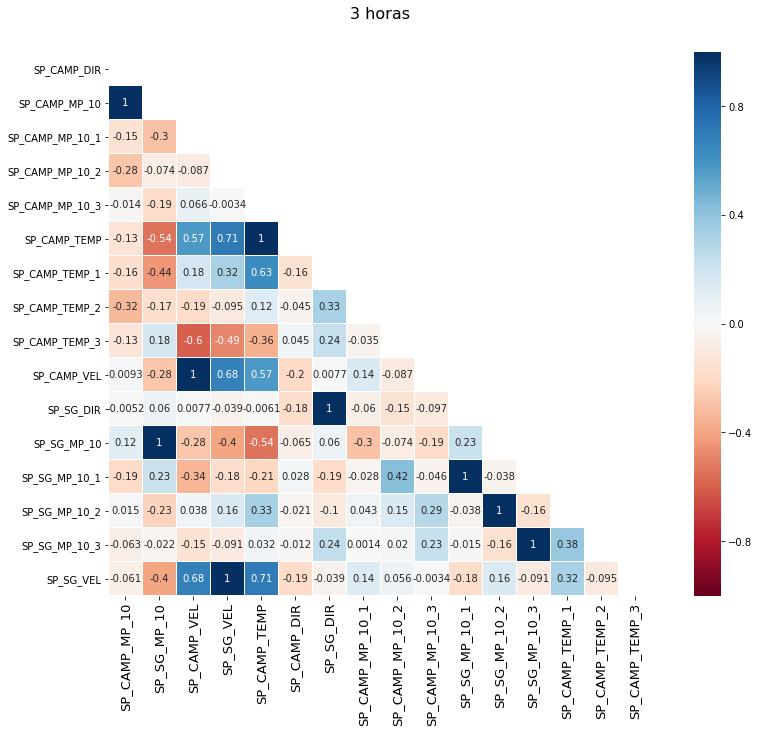

In [45]:
delay = 3
vel_cota = 0
i = 5# octante
var_not_corr = ['SP_SG_VEL','SP_CAMP_VEL', 'SP_CAMP_DIR','SP_SG_DIR']
df_MP10_wo_nan = df_MP10.dropna()
df_MP10_wo_nan = df_MP10_wo_nan.loc[(df_MP10_wo_nan['SP_CAMP_VEL'] >=vel_cota) & 
                                    (df_MP10_wo_nan['SP_SG_VEL'] >=vel_cota) & 
                                    (df_MP10_wo_nan['SP_CAMP_DIR'] >=i*45) & 
                                   (df_MP10_wo_nan['SP_CAMP_DIR'] <(i+1)*45) &
                                   (df_MP10_wo_nan['SP_SG_DIR'] >=i*45) &
                                   (df_MP10_wo_nan['SP_SG_DIR'] <(i+1)*45)]
df_new = df_derived_by_shift(df_MP10_wo_nan.loc[(df_MP10_wo_nan.index.day == 1) & 
                                                (df_MP10_wo_nan.index.year == 2016) &
                                               (df_MP10_wo_nan.index.month == 6)], delay, var_not_corr)
df_new= df_new.dropna()
df_corr = df_new.corr()
for year in range(2014,2019,1):
#for year in [2018]:
    meses = df_MP10_wo_nan.loc[(df_MP10_wo_nan.index.year==year) ].index.month
    #meses_set = set(meses)
    meses_set = [12,1,2,3]
    for month in meses_set:
        dias = df_MP10_wo_nan.loc[(df_MP10_wo_nan.index.year==year) & 
                                  (df_MP10_wo_nan.index.month==month)].index.day
        dias_set = set(dias)
        for day in dias_set:
            df_day = df_derived_by_shift(df_MP10_wo_nan.loc[(df_MP10_wo_nan.index.day == day) & 
                                                        (df_MP10_wo_nan.index.year == year) &
                                                       (df_MP10_wo_nan.index.month == month)], delay, var_not_corr)
            df_day = df_day.dropna()
            df_corr_day = df_day.corr()
            df_corr = pd.concat((df_corr, df_corr_day))
by_row_index = df_corr.groupby(df_corr.index)

colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.xticks(fontsize=13)
#plt.figure(figsize=(18,13))
plt.title(u'%d horas' % delay, y=1.05, size=16)

mask = np.zeros_like(by_row_index.mean())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(by_row_index.mean(), mask=mask, linewidths=0.1,vmax=1.0, vmin=-1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('corr_%d.png' % vel_cota, bbox_inches="tight")

In [28]:
df_MP10_wo_nan.shape

(1383, 7)

In [256]:
df_toy = df_MP10_wo_nan.loc[(df_MP10_wo_nan['SP_CAMP_VEL']>=7) & (df_MP10_wo_nan['SP_SG_VEL']>=7)]
df_toy.size

3647